# 온라인 쇼핑몰 월별매출액 함수 (음식서비스)

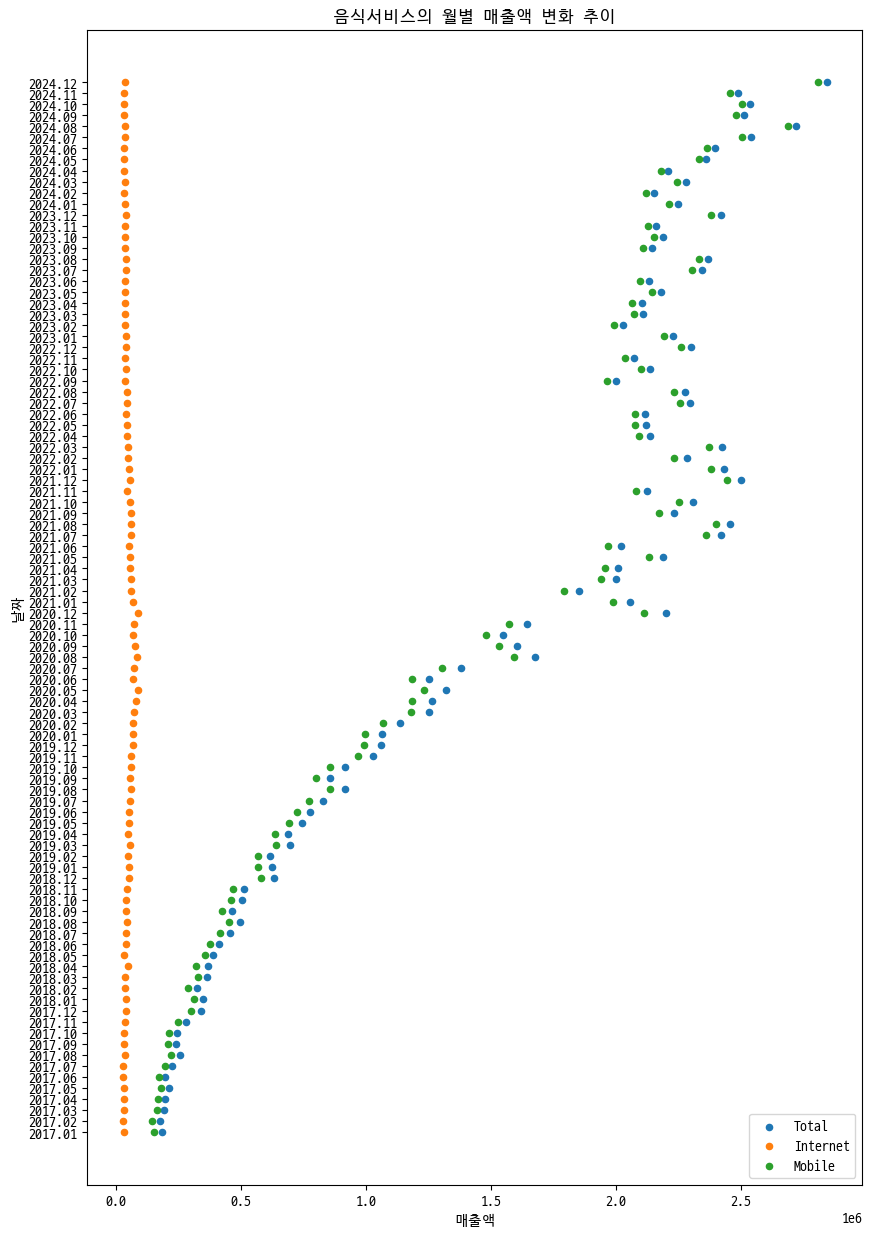


음식서비스의 경우 2019년부터 총 매출액이 증가하기 시작했으며, 2020년에는 코로나19로 인해 배달 서비스를 이용하는 소비자가 급증하면서 매출이 큰 폭으로 상승한 것으로 보입니다.
한편, 인터넷 판매에서는 큰 변화가 나타나지 않았으며, 대부분의 매출 증가는 모바일 플랫폼이 주도한 것으로 분석됩니다.



In [1]:
# 월별 카테고리 성장률 확인
# X축: 매출액
# Y축: 월별 (X축에 넣으려니 글자가 깨져서 Y축으로 이동)

# *** 카테고리 리스트 ***
# 컴퓨터 및 주변기기, 가전·전자·통신기기, 서적, 사무·문구, 의복, 신발, 가방, 패션용품 및 액세서리, 스포츠·레저용품, 화장품, 아동·유아용품, 음·식료품, 농축수산물, 생활용품, 자동차 및 자동차용품
# 가구, 애완용품, 여행 및 교통서비스, 문화 및 레저서비스, 이쿠폰서비스, 음식서비스, 기타서비스, 기타

#함수에 카테고리 이름을 넣으면 월별 매출액에 대한 성장률 확인 가능

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm

font = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
file_path = "dataset/온라인쇼핑몰_판매매체별_상품군별거래액.csv"

fm.fontManager.addfont(path = font)
matplotlib.rcParams["font.family"] = "D2Coding"

raw = pd.read_csv(file_path, encoding="EUC-KR")
raw.columns = ['Category', 'Date', 'Internet', 'Mobile']
raw['Total'] = raw['Internet'] + raw['Mobile']
raw['Date'] = raw['Date'].map(lambda x : x.replace(' p)',''))

fig, ax = plt.subplots(figsize = (10, 15))

def 월별매출액(category):
    Category_data = raw[raw['Category'] == category]
    ax.scatter(Category_data['Total'],Category_data['Date'], s = 20, label = 'Total')
    ax.scatter(Category_data['Internet'],Category_data['Date'], s = 20, label = 'Internet')
    ax.scatter(Category_data['Mobile'],Category_data['Date'], s = 20, label = 'Mobile')
    
    ax.set_xlabel('매출액')
    ax.set_ylabel('날짜')
    ax.set_title(category + '의 월별 매출액 변화 추이')
    ax.legend(loc="best")
    plt.show()

월별매출액('음식서비스')

print("""
음식서비스의 경우 2019년부터 총 매출액이 증가하기 시작했으며, 2020년에는 코로나19로 인해 배달 서비스를 이용하는 소비자가 급증하면서 매출이 큰 폭으로 상승한 것으로 보입니다.
한편, 인터넷 판매에서는 큰 변화가 나타나지 않았으며, 대부분의 매출 증가는 모바일 플랫폼이 주도한 것으로 분석됩니다.
""")


# 교통사고

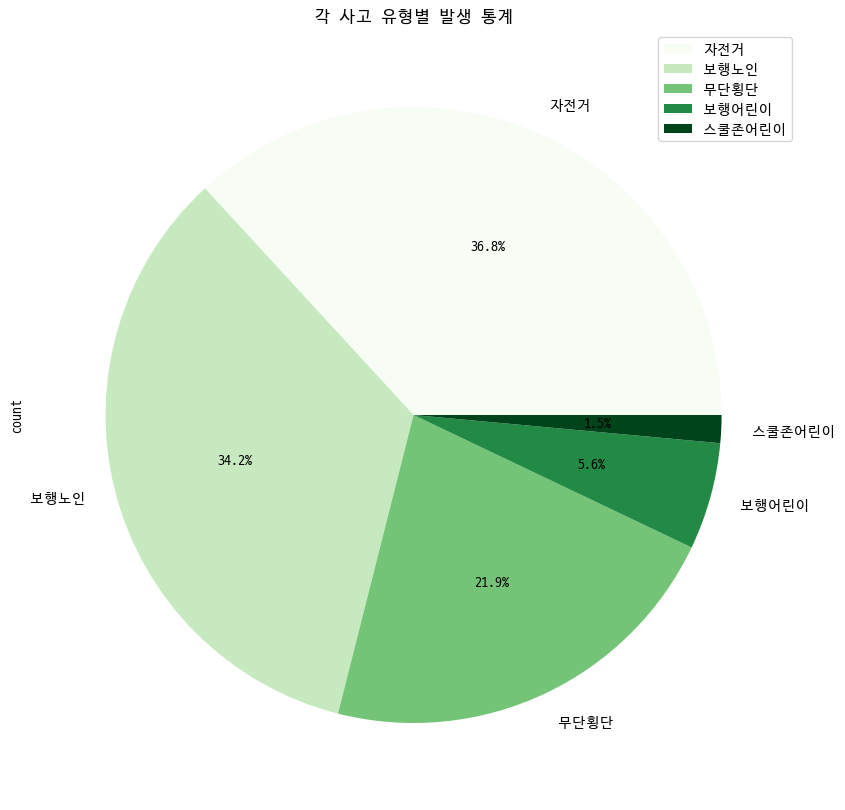

<Figure size 640x480 with 0 Axes>

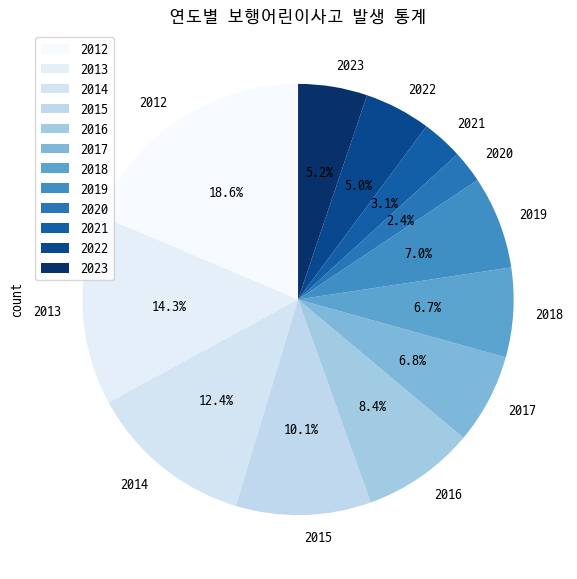

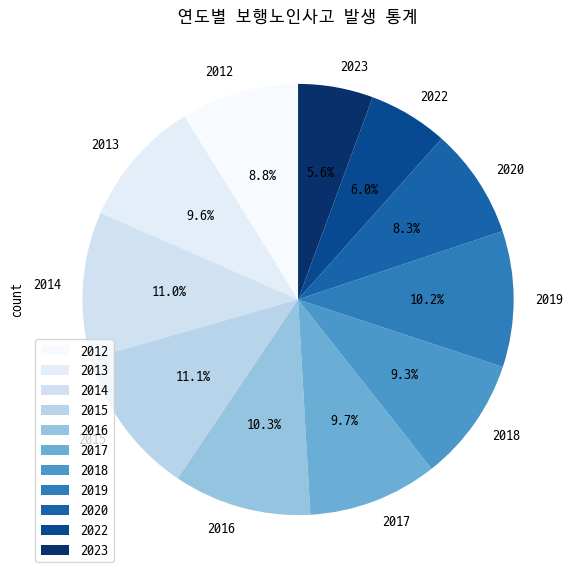

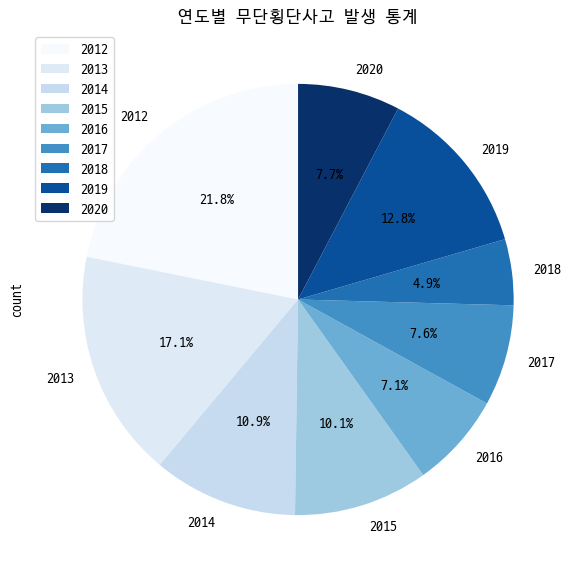

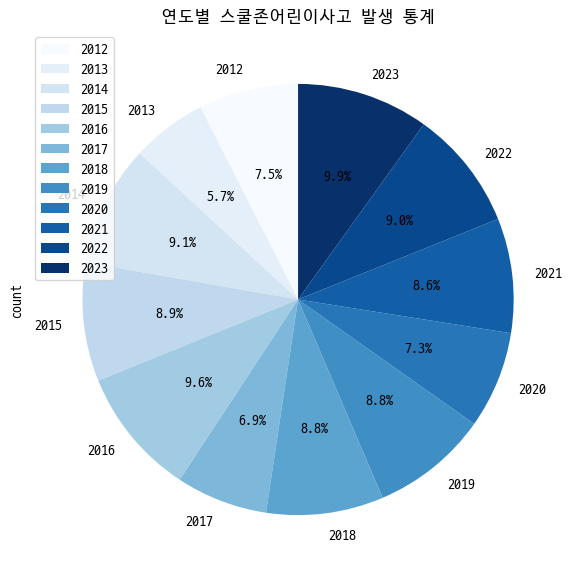

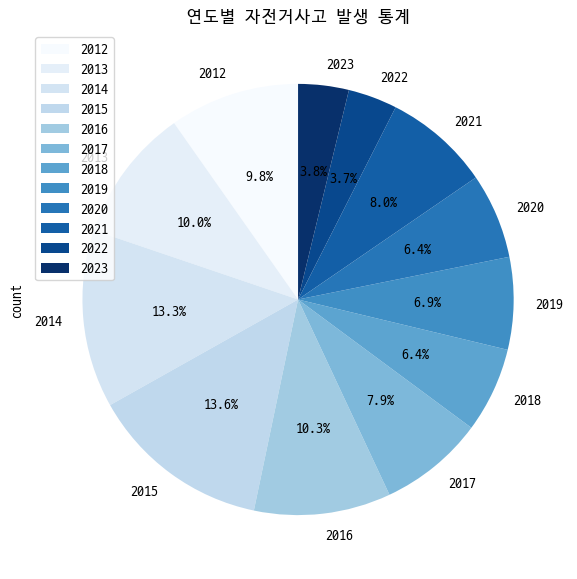


각 사고 유형별로 자전거 사고가 가장 많은 비율을 차지하고 있으며, 보행 노인 사고 또한 높은 비율을 보입니다.
해가 지날수록 전반적인 사고 발생률은 감소하는 추세지만, 스쿨존 사고는 지속적으로 유지되고 있습니다.
스쿨존은 어린이 보행자를 위한 공간이므로, 사고율을 줄일 수 있는 대책이 필요합니다.



In [27]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import display, HTML
import pandas as pd

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "dataset/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding = 'EUC_KR')
ori.head()

ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name = "count")
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'})
ori_data

ori_data.plot(kind = 'pie', y = 'count', labels = ori_data['type'], title = "각 사고 유형별 발생 통계", cmap = matplotlib.cm.Greens, autopct = '%2.1f%%', figsize = (10,10), startangle = 0)
plt.show()
plt.savefig('chart/accident.jpg')

ex_data = ori.copy()
ex_data = ex_data.rename(columns = {'사고유형구분':'type'})
ex2_data = list(set(ex_data['type']))
# print(ex2_data)
data_list = []
for e in ex2_data:
    data_list.append(ex_data[ex_data['type'] == e])
# print(data_list)

total_list = []
for d in data_list:
    result = d.groupby('사고연도')['사고건수'].sum().reset_index(name = 'count')
    total_list.append(result)

for e in range(len(ex2_data)):
    total_list[e].plot(
        kind = 'pie',
        y = 'count',
        labels = total_list[e]['사고연도'],
        figsize = (7,7),
        autopct = '%.1f%%',
        title = '연도별 ' + ex2_data[e] + '사고 발생 통계',
        cmap = matplotlib.cm.Blues,
        startangle = 90
    )
    plt.savefig(f'./chart/accident{e}.jpg')
    plt.show()

# html = f"""
# <div style = "display: flex; flex-wrap: wrap; gap: 20px; width: 100%; padding: 20px;">"""
# for i in range(len(ex2_data)):
#     html += f"""<img src = "chart/accident{i}.jpg">"""
# html += """</div>"""
# display(HTML(html))

print("""
각 사고 유형별로 자전거 사고가 가장 많은 비율을 차지하고 있으며, 보행 노인 사고 또한 높은 비율을 보입니다.
해가 지날수록 전반적인 사고 발생률은 감소하는 추세지만, 스쿨존 사고는 지속적으로 유지되고 있습니다.
스쿨존은 어린이 보행자를 위한 공간이므로, 사고율을 줄일 수 있는 대책이 필요합니다.
""")

# 청소년정신건강

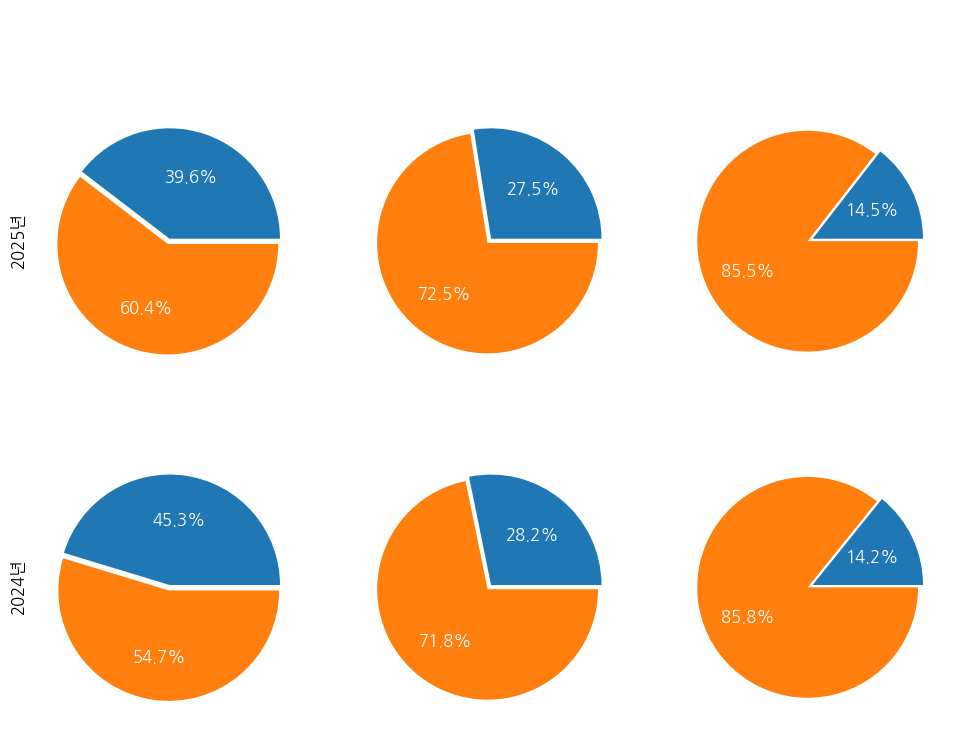


2024년에 비해 2025년의 스트레스 비율과 우울증의 비율은 줄었지만 자살에 대해서는 비율이 소폭 증가한 것으로 보아 감정을 느끼는 사람이 적어졌어도 우울감의 깊이가 더 깊어진 사람의 비율이 늘었다고 볼 수 있다.



In [13]:
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

file_path = "dataset/청소년정신건강20250304.csv"
ori = pd.read_csv(file_path)
ori = ori.loc[:,'스트레스 인지율':]
ori.columns = ['스트레스', '스트레스 남학생','스트레스 여학생', '우울감 경험율', '우울 남학생', '우울 여학생', '자살 생각율', '자살 남학생', '자살 여학생']
ori.loc[1:] = ori.loc[1:].astype('float64')
ori = ori.loc[1:]
ori.loc[3] = 100 - ori.loc[1]
ori.loc[4] = 100 - ori.loc[2]
ori['응답'] = ['그렇다','그렇다','아니다','아니다']
ori = ori.set_index('응답')
ori

fontlist = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
fontlist

path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)

fig, ax = plt.subplots(2,3,figsize = (10,8))
pd.set_option('future.no_silent_downcasting', True)

ori.iloc[:4:2]['스트레스'].plot.pie(explode = [0, 0.05], ax = ax[0][0], autopct = "%.1f%%")
ax[0][0].set_title('스트레스를 받은 적이 있다.')
ax[0][0].set_ylabel('2025년')

ori.iloc[:4:2]['우울감 경험율'].plot.pie(explode = [0, 0.05], ax = ax[0][1], autopct = "%.1f%%")
ax[0][1].set_title('우울증을 경험한 적이 있다.')
ax[0][1].set_ylabel('')

ori.iloc[:4:2]['자살 생각율'].plot.pie(explode = [0, 0.05], ax = ax[0][2], autopct = "%.1f%%")
ax[0][2].set_title('자살을 고민한 적이 있다.')
ax[0][2].set_ylabel('')

ori.iloc[1:4:2]['스트레스'].plot.pie(explode = [0, 0.05], ax = ax[1][0], autopct = "%.1f%%")
ax[1][0].set_ylabel('2024년')

ori.iloc[1:4:2]['우울감 경험율'].plot.pie(explode = [0, 0.05], ax = ax[1][1], autopct = "%.1f%%")
ax[1][1].set_ylabel('')

ori.iloc[1:4:2]['자살 생각율'].plot.pie(explode = [0, 0.05], ax = ax[1][2], autopct = "%.1f%%")
ax[1][2].set_ylabel('')

plt.suptitle('2024년 ~ 2025년 청소년 정신건강관련 통계')
plt.tight_layout()
plt.show()

print("""
2024년에 비해 2025년의 스트레스 비율과 우울증의 비율은 줄었지만 자살에 대해서는 비율이 소폭 증가한 것으로 보아 감정을 느끼는 사람이 적어졌어도 우울감의 깊이가 더 깊어진 사람의 비율이 늘었다고 볼 수 있다.
""")

# 연령별취업자수

['경기도', '대구광역시', '전라남도', '경상북도', '강원도', '광주광역시', '제주도', '대전광역시', '충청남도', '서울특별시', '인천광역시', '부산광역시', '경상남도', '충청북도', '전라북도', '세종특별자치시', '울산광역시']


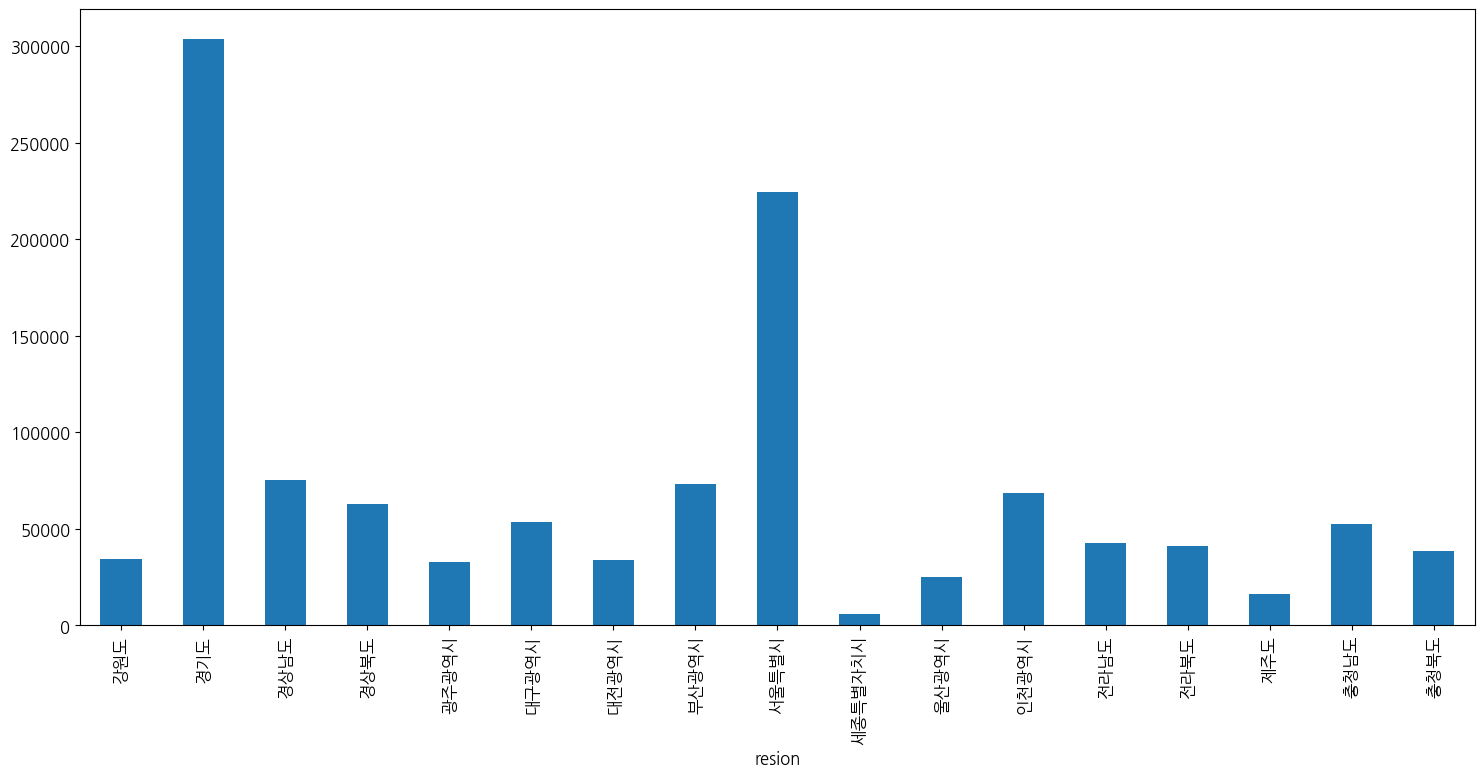


전체 시도 취업 인원을 살펴보면 경기도가 압도적인 1위고 2위는 서울특별시이다.
나머지는 1,2위의 절반 수치에도 다가가지 못해 대부분의 취업 인원이 경기, 서울 지역에 밀집되어있다고 볼 수 있다.



In [14]:
import pandas as pd
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)

ori = pd.read_csv('dataset/행정구역시도성연령별취업자.csv', encoding='EUC-KR')
# ori.head()

ex_data = ori.copy()

ex_data.columns = ['resion', 'date', 'age', 'gender', 'value']
ex_data.loc[ex_data['resion'] == '세종특별자치시','value'] = ex_data.loc[ex_data['resion'] == '세종특별자치시','value'].replace('-',0)
ex_data[ex_data['resion'] == '세종특별자치시']['value']
# ex_data

ex_data['value'] = ex_data['value'].astype(int)
resion_data = ex_data.groupby('resion')['value'].sum()
print(list(set(ex_data['resion'])))

resion_data.plot(kind = 'bar',x = 'resion', y = 'value', figsize=(18,8))
plt.show()

print("""
전체 시도 취업 인원을 살펴보면 경기도가 압도적인 1위고 2위는 서울특별시이다.
나머지는 1,2위의 절반 수치에도 다가가지 못해 대부분의 취업 인원이 경기, 서울 지역에 밀집되어있다고 볼 수 있다.
""")

# 지하철이용현황

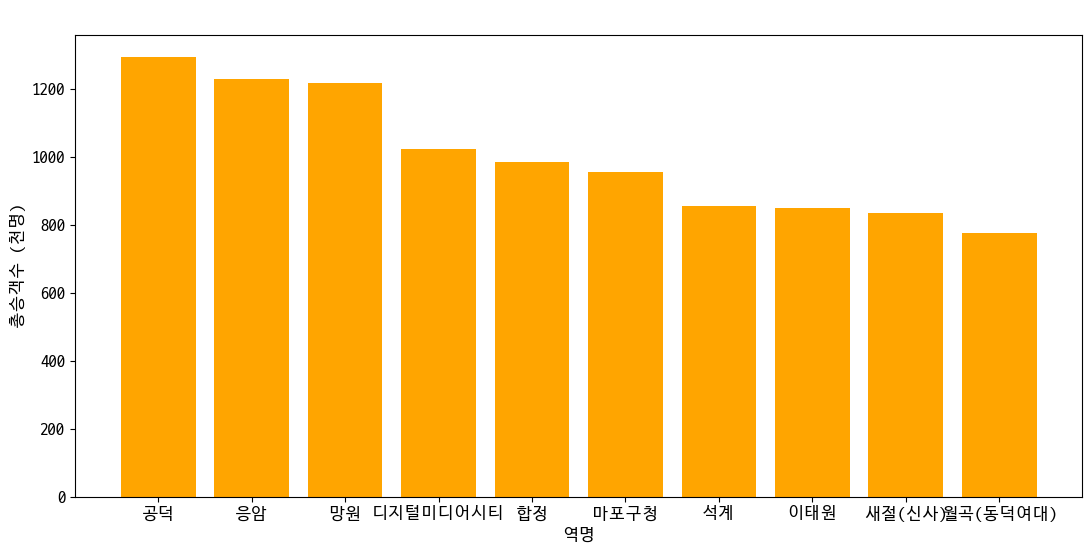

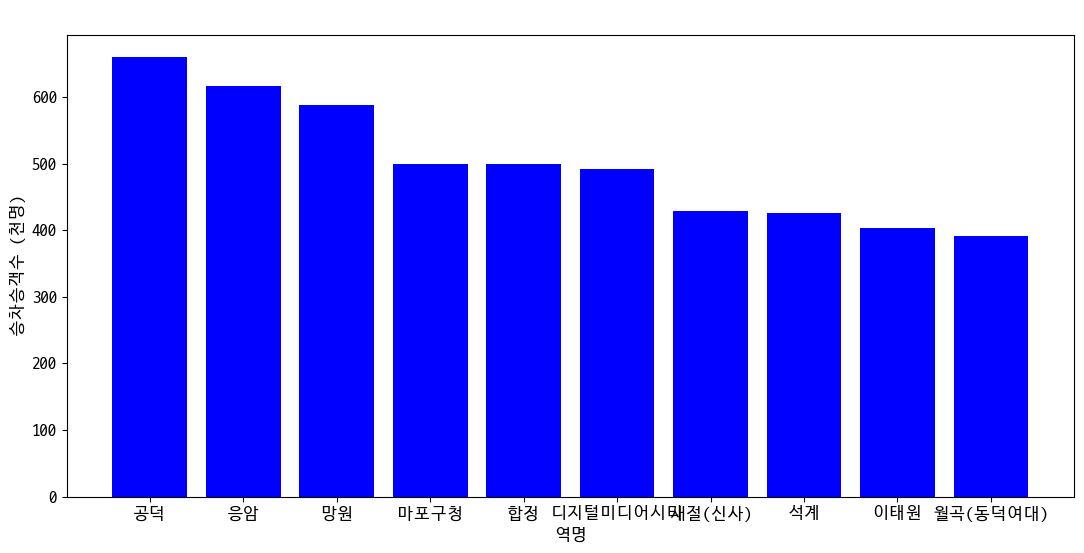

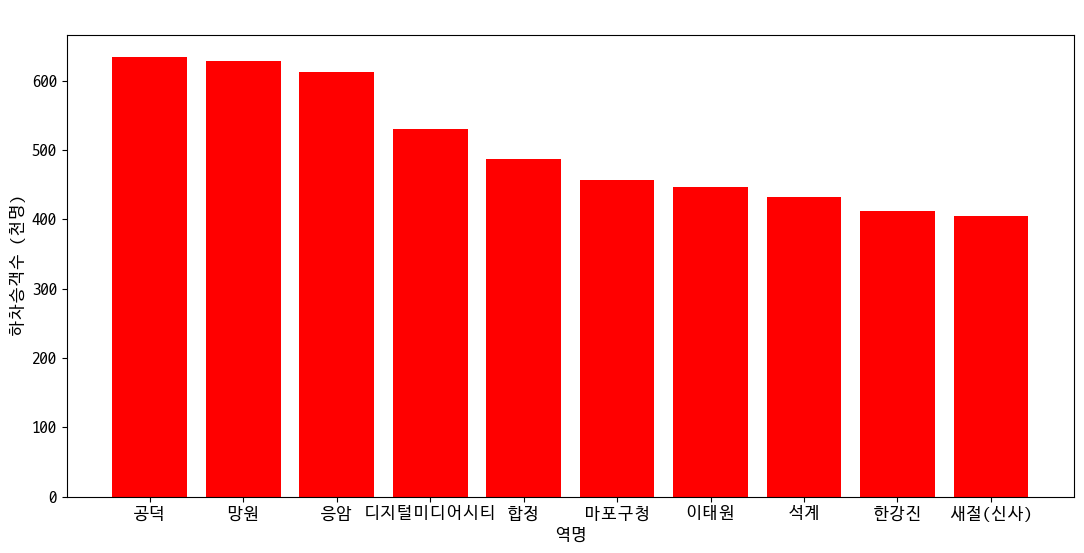

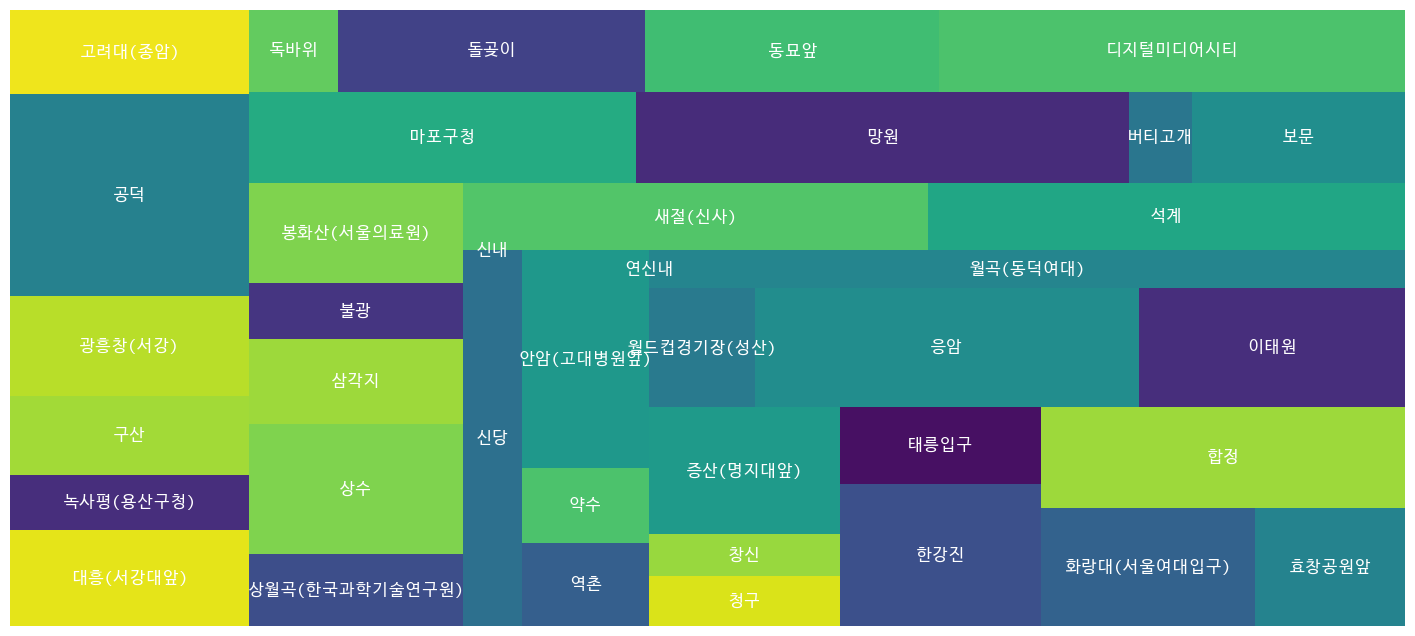


서울 지하철 6호선에서는 공덕역이 가장 유동인구가 많다.
그 다음 응암역이 차지했는데 승차 인원 또한 2등이지만 하차 인원은 망원이 2등으로 승하차 인원이 차이난다.
그 외 다른 역들을 보면 승차 인원과 하차 인원의 순위가 다르다는 것을 알 수 있다.



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify

# 커스텀 폰트 로드 및 설정
d2_path = 'dataset/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

# 데이터 로드
file_path = "dataset/Seoul1.csv"
raw = pd.read_csv(file_path, encoding='EUC-KR')

# 6호선 데이터 필터링
호선1 = raw[raw['호선명'] == '6호선']
호선1 = 호선1[['역명', '승차총승객수', '하차총승객수']]

# 역명별 그룹화 및 총 승객수 계산
역명그룹 = 호선1.groupby(['역명']).sum().reset_index()
역명그룹['총승객수'] = 역명그룹['승차총승객수'] + 역명그룹['하차총승객수']

def 총승객():
    """
    6호선 역별 총 승객수 상위 10개 역 시각화
    """
    # 총 승객수로 정렬하고 상위 10개 역 선택
    총승객 = 역명그룹.sort_values(by='총승객수', ascending=False)
    총승객10 = 총승객[:10]
    
    # 막대 그래프 생성
    plt.figure(figsize=(13, 6))
    plt.title('서울 지하철 6호선 총 승객별 Top 10')
    plt.bar(x=총승객10['역명'], height=총승객10['총승객수'] / 1000, color='orange')
    plt.xlabel('역명')
    plt.ylabel('총승객수 (천명)')
    plt.show()

def 승차승객():
    """
    6호선 역별 승차 승객수 상위 10개 역 시각화
    """
    # 승차 승객수로 정렬하고 상위 10개 역 선택
    승차 = 역명그룹.sort_values(by='승차총승객수', ascending=False)
    승차10 = 승차[:10]
    
    # 막대 그래프 생성
    plt.figure(figsize=(13, 6))
    plt.bar(x=승차10['역명'], height=승차10['승차총승객수'] / 1000, color='blue')
    plt.title('서울 지하철 6호선 승차 승객별 Top 10')
    plt.xlabel('역명')
    plt.ylabel('승차승객수 (천명)')
    plt.show()

def 하차승객():
    """
    6호선 역별 하차 승객수 상위 10개 역 시각화
    """
    # 하차 승객수로 정렬하고 상위 10개 역 선택
    하차 = 역명그룹.sort_values(by='하차총승객수', ascending=False)
    하차10 = 하차[:10]
    
    # 막대 그래프 생성
    plt.figure(figsize=(13, 6))
    plt.bar(x=하차10['역명'], height=하차10['하차총승객수'] / 1000, color='red')
    plt.title('서울 지하철 6호선 하차 승객별 Top 10')
    plt.xlabel('역명')
    plt.ylabel('하차승객수 (천명)')
    plt.show()

def 전체승객분포():
    """
    6호선 전체 역의 승객 분포 시각화
    """
    # 트리맵 생성
    plt.figure(figsize=(18, 8))
    squarify.plot(sizes=역명그룹['총승객수'], label=역명그룹['역명'])
    plt.rcParams["font.size"] = 12
    plt.rcParams["text.color"] = 'white'
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.show()

총승객()
승차승객()
하차승객()
전체승객분포()

print("""
서울 지하철 6호선에서는 공덕역이 가장 유동인구가 많다.
그 다음 응암역이 차지했는데 승차 인원 또한 2등이지만 하차 인원은 망원이 2등으로 승하차 인원이 차이난다.
그 외 다른 역들을 보면 승차 인원과 하차 인원의 순위가 다르다는 것을 알 수 있다.
""")


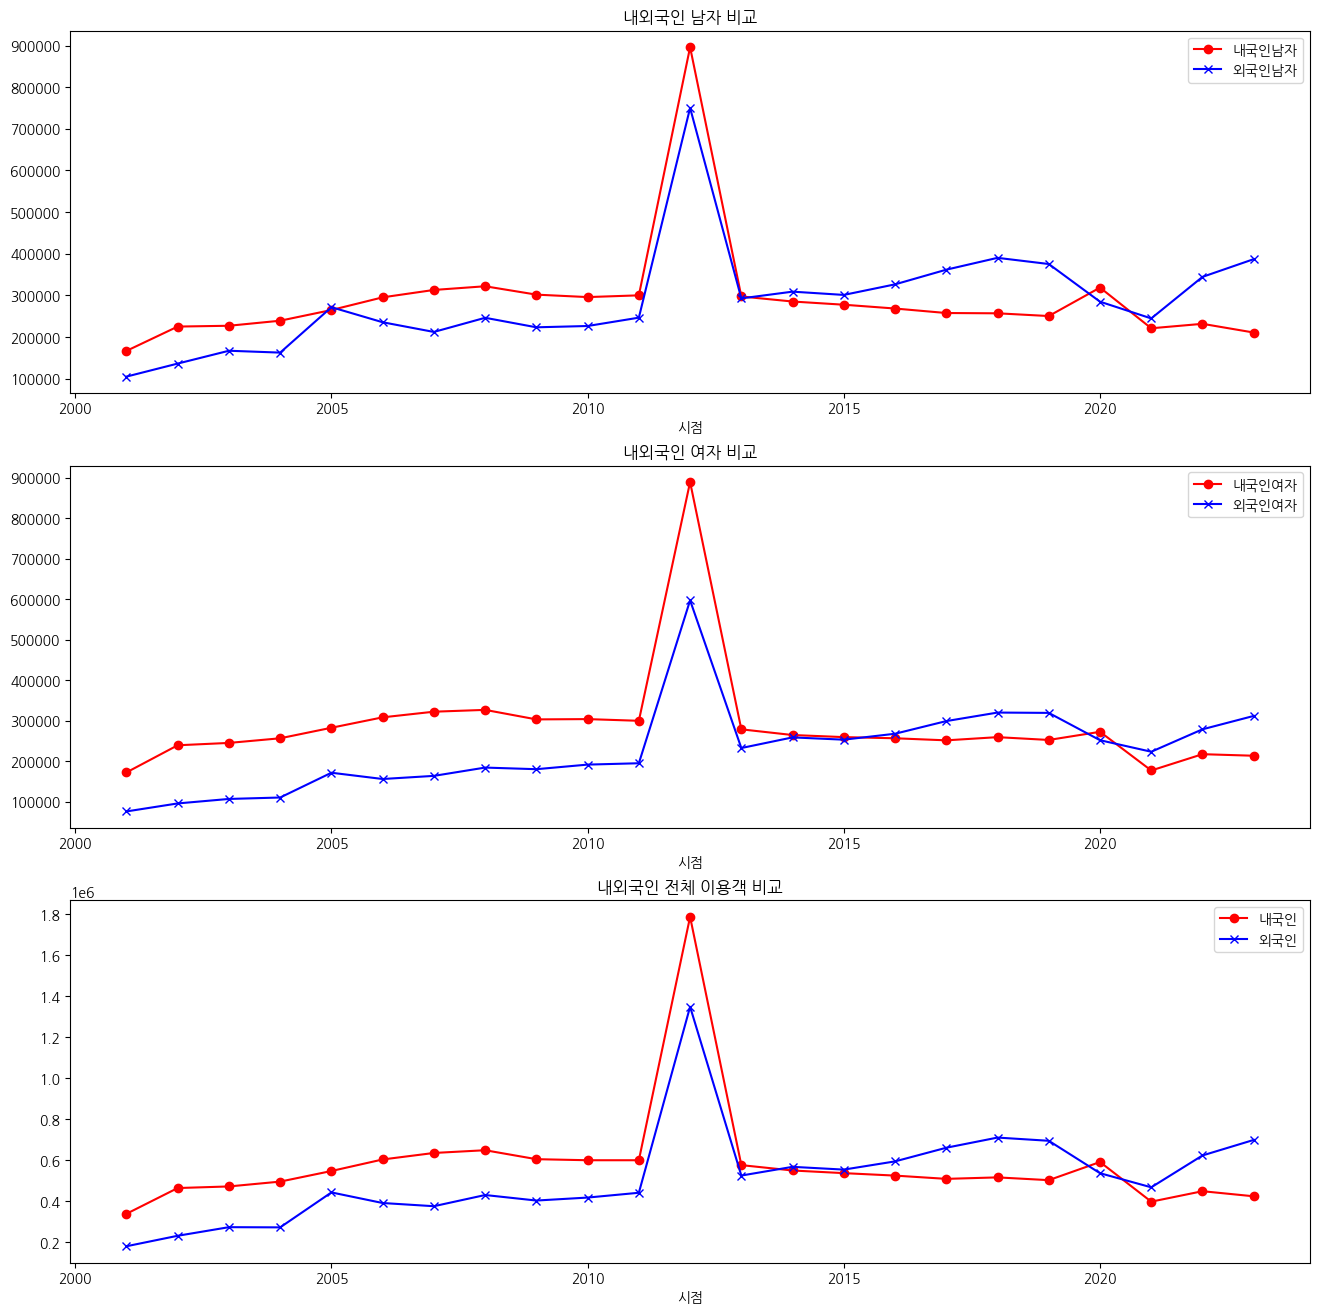


전체적으로 2012년에 국내에 방문한 여행객들이 많은걸 볼 수 있다. 2012년에 여수엑스포가 열렸었는데 그 이유에서 방문객이 많지 않았나하는 추측이다.
2015년도 이전에는 내국인의 인천공항 이용이 외국인보다 컸지만, 이후로는 외국인이 더 많이 이용한다는 것을 알 수 있다.
코로나 시기에 인천공항 이용객이 많이 줄었지만 2021년 이후로 이용이 증가하고 있다. 특히 외국인의 증가세가 크다.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

ori = pd.read_csv('dataset/출입국항구내외국인성별국제이동연간20250305.csv', encoding='EUC-KR')
ex_data = ori.copy()


path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)

내국인남자 = ex_data[(ex_data['내외국인별'] == '내국인') & (ex_data['성별'] == '남자')].groupby('시점')['데이터'].sum().reset_index(name="total")
외국인남자 = ex_data[(ex_data['내외국인별'] == '외국인') & (ex_data['성별'] == '남자')].groupby('시점')['데이터'].sum().reset_index(name="total")

내국인여자 = ex_data[(ex_data['내외국인별'] == '내국인') & (ex_data['성별'] == '여자')].groupby('시점')['데이터'].sum().reset_index(name="total")
외국인여자 = ex_data[(ex_data['내외국인별'] == '외국인') & (ex_data['성별'] == '여자')].groupby('시점')['데이터'].sum().reset_index(name="total")

내국인이용객 = ex_data[ex_data['내외국인별'] == '내국인'].groupby('시점')['데이터'].sum().reset_index(name="total")
외국인이용객 = ex_data[ex_data['내외국인별'] == '외국인'].groupby('시점')['데이터'].sum().reset_index(name="total")

fig, ax = plt.subplots(3,1, figsize = (16,16))

내국인남자.plot(ax = ax[0], x = '시점', y = 'total', color = 'red', label = '내국인남자', title = '내외국인 남자 비교', marker = 'o')
외국인남자.plot(ax = ax[0], x = '시점', y = 'total', color = 'blue', label = '외국인남자', marker = 'x')

내국인여자.plot(ax = ax[1], x = '시점', y = 'total', color = 'red', label = '내국인여자', title = '내외국인 여자 비교', marker = 'o')
외국인여자.plot(ax = ax[1], x = '시점', y = 'total', color = 'blue', label = '외국인여자', marker = 'x')

내국인이용객.plot(ax = ax[2], x = '시점', y = 'total', color = 'red', label = '내국인', title = '내외국인 전체 이용객 비교', marker = 'o')
외국인이용객.plot(ax = ax[2], x = '시점', y = 'total', color = 'blue', label = '외국인', marker = 'x')

plt.show()

print("""
전체적으로 2012년에 국내에 방문한 여행객들이 많은걸 볼 수 있다. 2012년에 여수엑스포가 열렸었는데 그 이유에서 방문객이 많지 않았나하는 추측이다.
2015년도 이전에는 내국인의 인천공항 이용이 외국인보다 컸지만, 이후로는 외국인이 더 많이 이용한다는 것을 알 수 있다.
코로나 시기에 인천공항 이용객이 많이 줄었지만 2021년 이후로 이용이 증가하고 있다. 특히 외국인의 증가세가 크다.
""")
